In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass


In [2]:
@dataclass
class Hit :
    start:   float =0
    end :    float =0
    peakT:   float =0
    TOT:     float =0
    peakADC: float =0
    SADC:    float =0

In [3]:
#-------------------------------------------
#Primitive hit finding
#-------------------------------------------
def FindHits(waveform, thresh):
    is_hit = False

    hit_charge =[]    
    this_hit = Hit()
   
    hits = []

    for tick, adc  in enumerate(waveform):
        if (adc > thresh and is_hit==False):
            is_hit = True
            this_hit.start =tick
           
        if(is_hit == True):
            hit_charge.append(adc)
           
        if (is_hit and adc<thresh):
            this_hit.end  = tick
            is_hit = False
           
            for index, ADC in enumerate(hit_charge):
                if (ADC == np.max(hit_charge)):
                    this_hit.peakADC = ADC
                    this_hit.peakT = index
            this_hit.SADC = np.sum(hit_charge)
            this_hit.TOT = this_hit.end - this_hit.start
            hits.append(this_hit)

            #clean up for next hit
            hit_charge = []
            this_hit = Hit()


    return hits #return set of hits for waveform

#load waveform data (100 low energy electron events, 5 - 100 MeV)
col = np.loadtxt("PedSubWaveform_Dump.txt")
ind = np.loadtxt("PedSubWaveformInd_Dump.txt")


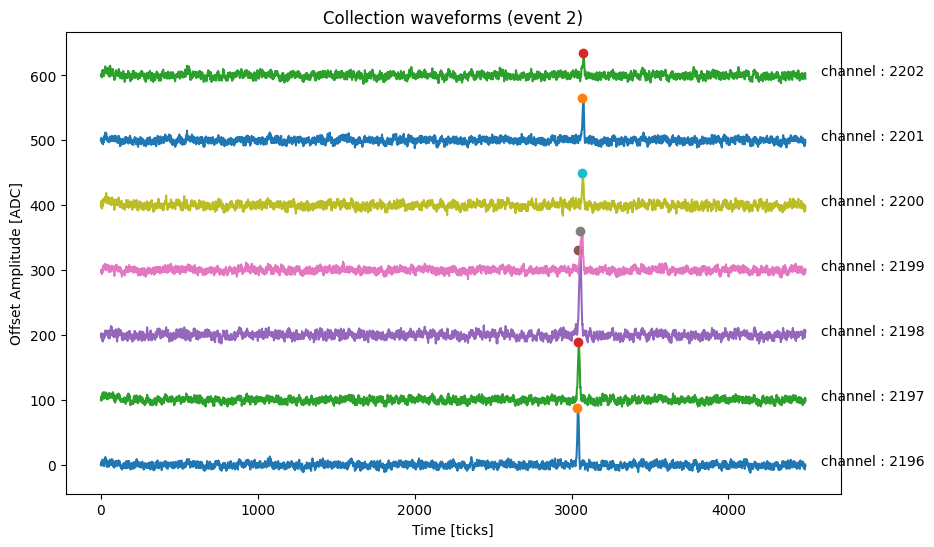

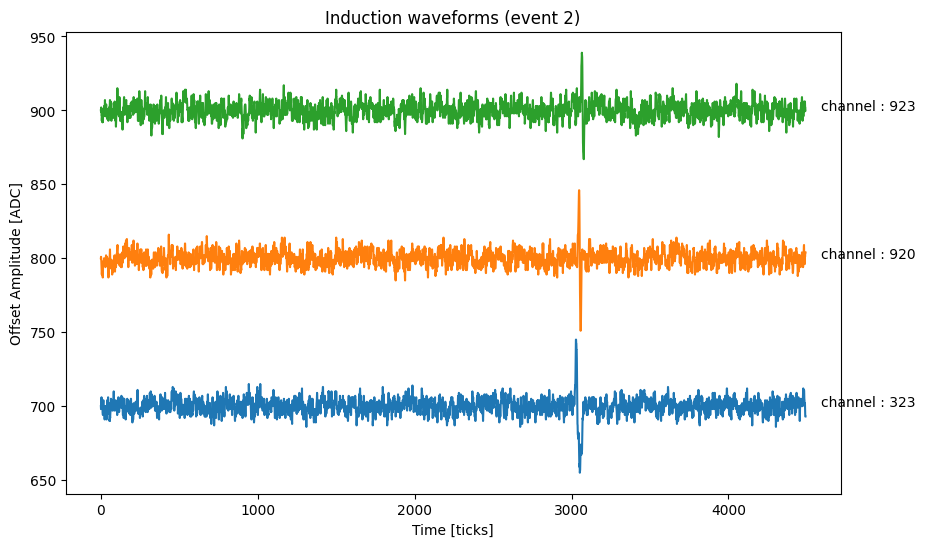

In [4]:

event = 2
threshold = 30

#plot collection waveforms from event
plt.figure(figsize = (10,6))
offset = 0
for data in col:
    if (data[0]==event):
        ADCS = data[2:]
        plt.title("Collection waveforms (event %.0f)" %event)
        plt.plot(ADCS + offset)#offset by channel number
       
        hits = FindHits(ADCS, threshold)
        for hit in hits:
            plt.plot(hit.start,hit.peakADC + offset,'o')
           
        plt.text(len(ADCS) + 100, offset, 'channel : %.0f' %data[1])
        offset+=100
        plt.ylabel("Offset Amplitude [ADC]")
        plt.xlabel("Time [ticks]")
plt.show()

#plot induction waveforms for event
plt.figure(figsize = (10,6))
for data in ind:
    if (data[0]==event):
        ADCS = data[2:]
        plt.title("Induction waveforms (event %.0f)" %event)
        plt.plot(ADCS + offset)#offset by channel number
        plt.text(len(ADCS) + 100, offset, 'channel : %.0f' %data[1])
        offset+=100
        plt.ylabel("Offset Amplitude [ADC]")
        plt.xlabel("Time [ticks]")
plt.show()